In [2]:
import pandas as pd

path_to_train = './data/train.csv'
path_to_test = './data/test.csv'

train = pd.read_csv(path_to_train, encoding='utf-8', usecols=['release_date'])
test = pd.read_csv(path_to_test, encoding='utf-8', usecols=['release_date'])

df = pd.concat([train, test], ignore_index=True)
df.tail()

,release_date
7578747,20161014
7578748,20161014
7578749,19910101
7578750,19910101
7578751,19910101


In [11]:
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

def extract_date(date_int):
    date_str = str(date_int)
    year = int(date_str[0:4])
    month = int(date_str[4:6])
    day = int(date_str[6:8])
    return date(year, month, day)

df['release_date_dt'] = df.apply(lambda row: extract_date(row['release_date']),axis=1)
df.head()

,release_date,release_date_dt
0,20040704,2004-07-04
1,20060301,2006-03-01
2,20140714,2014-07-14
3,20001030,2000-10-30
4,20080215,2008-02-15


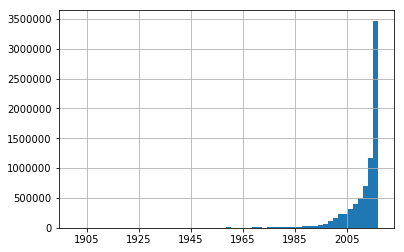

In [20]:
df['release_date_dt'].hist(bins=60)

In [19]:
df.ix[df['release_date'] > 30000000,'release_date_dt'] = date(2000,1,1)
df.ix[df['release_date'] > 30000000,'release_date'] = 20000101

In [21]:
df['release_date_year'] = df.apply(lambda row: row['release_date_dt'].year, axis=1)
df['release_date_month'] = df.apply(lambda row: row['release_date_dt'].month, axis=1)
df['release_date_day'] = df.apply(lambda row: row['release_date_dt'].day, axis=1)

In [26]:
df['release_date_decade'] = df.apply(lambda row: int((row['release_date_dt'].year-1900)/10), axis=1)

In [29]:
df['release_date_decade'].head(10)

0    10
1    10
2    11
3    10
4    10
5    10
6    10
7    10
8    10
9    10
Name: release_date_decade, dtype: int64

In [41]:
path_to_release_date_train = './data/features/release_date.train.txt'
path_to_release_date_test = './data/features/release_date.test.txt'

In [ ]:
del df['release_date_dt']
del df['release_date']

In [42]:
train_dt = df.loc[range(len(train))]
train_dt.to_csv(path_to_release_date_train, encoding='utf-8', index=False)

test_dt = df.loc[range(len(train), len(test))]
test_dt.to_csv(path_to_release_date_test, encoding='utf-8', index=False)